In [96]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [97]:
# import csv
csv_path = "../sourcing_artifacts/draft_history.csv"
df = pd.read_csv(csv_path)
display(df.head())

,Year,No.,Round,Pick,Player,Name,Team,College
0,2024,1,1,1,1,Caleb Williams,Bears,USC
1,2024,2,1,2,2,Jayden Daniels,Commanders,Louisiana State
2,2024,3,1,3,3,Drake Maye,Patriots,North Carolina
3,2024,4,1,8,8,Michael Penix,Falcons,Washington
4,2024,5,1,10,10,J.J. McCarthy,Vikings,Michigan


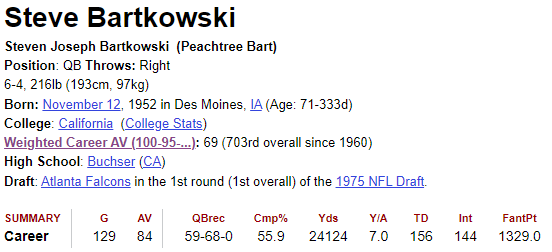




In [98]:
# Convert 'Year' column to numeric, forcing errors to NaN, then drop rows with NaN in 'Year'
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Now filter with the cleaned 'Year' column and select the 'Year' and 'Name' columns
qb_names_to_1969 = df.loc[(df["Year"] > 1900) & (df["Year"] < 1970), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_to_1969))
display(qb_names_to_1969.head())

qb_names_1970_9= df.loc[(df["Year"] >= 1970) & (df["Year"] <= 1979), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_1970_9))
display(qb_names_1970_9.head())

qb_names_1980_9= df.loc[(df["Year"] >= 1980) & (df["Year"] <= 1989), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_1980_9))
display(qb_names_1980_9)

qb_names_1990_9= df.loc[(df["Year"] >= 1990) & (df["Year"] <= 1999), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_1990_9))
display(qb_names_1990_9)

qb_names_2000_9= df.loc[(df["Year"] >= 2000) & (df["Year"] <= 2009), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_2000_9))
display(qb_names_2000_9)

qb_names_2010_9= df.loc[(df["Year"] >= 2010) & (df["Year"] <= 2019), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_2010_9))
display(qb_names_2010_9)

qb_names_2020_= df.loc[(df["Year"] >= 2020), ['Year', 'Name']].reset_index(drop=True)
display(len(qb_names_2020_))
display(qb_names_2020_)


289

,Year,Name
0,1969.0,Greg Cook
1,1969.0,Marty Domres
2,1969.0,Terry Hanratty
3,1969.0,Bobby Douglass
4,1969.0,Al Woodall


188

,Year,Name
0,1979.0,Jack Thompson
1,1979.0,Phil Simms
2,1979.0,Steve Fuller
3,1979.0,Joe Montana
4,1979.0,Steve Dils


156

,Year,Name
0,1989.0,Troy Aikman
1,1989.0,Mike Elkins
2,1989.0,Billy Joe Tolliver
3,1989.0,Anthony Dilweg
4,1989.0,Erik Wilhelm
...,...,...
151,1980.0,Dan Hartwig
152,1980.0,Turk Schonert
153,1980.0,Mike Wright
154,1980.0,Jimmy Jordan


124

,Year,Name
0,1999.0,Tim Couch
1,1999.0,Donovan McNabb
2,1999.0,Akili Smith
3,1999.0,Daunte Culpepper
4,1999.0,Cade McNown
...,...,...
119,1990.0,Todd Hammel
120,1990.0,Gene Benhart
121,1990.0,John Gromos
122,1990.0,Major Harris


130

,Year,Name
0,2009.0,Matthew Stafford
1,2009.0,Mark Sanchez
2,2009.0,Josh Freeman
3,2009.0,Pat White
4,2009.0,Stephen McGee
...,...,...
125,2000.0,Todd Husak
126,2000.0,JaJuan Seider
127,2000.0,Tim Rattay
128,2000.0,Jarious Jackson


118

,Year,Name
0,2019.0,Kyler Murray
1,2019.0,Daniel Jones
2,2019.0,Dwayne Haskins
3,2019.0,Drew Lock
4,2019.0,Will Grier
...,...,...
113,2010.0,Joe Webb
114,2010.0,Tony Pike
115,2010.0,Levi Brown
116,2010.0,Sean Canfield


57

,Year,Name
0,2024.0,Caleb Williams
1,2024.0,Jayden Daniels
2,2024.0,Drake Maye
3,2024.0,Michael Penix
4,2024.0,J.J. McCarthy
5,2024.0,Bo Nix
6,2024.0,Spencer Rattler
7,2024.0,Jordan Travis
8,2024.0,Joe Milton
9,2024.0,Devin Leary


In [99]:
import re

def get_weighted_career_av(soup):
    # Locate the div with id 'meta'
    meta_div = soup.find('div', id='meta')
    
    # Initialize variables for storing the AV value and rank
    weighted_av = None
    overall_rank = None
    
    if meta_div:
        # Find text with the "Weighted Career AV" pattern
        av_match = re.search(r'(\d+)\s\((\d+)(?:st|nd|rd|th) overall since 1960\)', meta_div.text)
        
        if av_match:
            weighted_av = av_match.group(1)  # First capture group for the AV number
            overall_rank = av_match.group(2)  # Second capture group for the rank number
    
    if not weighted_av:
        print("No 'Weighted Career AV' found.")
    else:
        print(f"Weighted Career AV: {weighted_av}, Overall Rank: {overall_rank}")
    
    return weighted_av, overall_rank


In [100]:
import re
from bs4 import BeautifulSoup

def get_qb_header_data(soup):
    qb_header_data = {
        'throws': '', 'hall_of_fame': '', 'college': '', 'high_school': '',
        'weighted_career_av': '', 'overall_rank': '', 'college_stats': '',
        'draft_team': '', 'draft_round': '', 'draft_pick': '', 'draft_year': ''
    }
    try:
        # Extract Throws
        throws_tag = soup.find('strong', string='Throws:')
        if throws_tag and throws_tag.next_sibling:
            qb_header_data['throws'] = throws_tag.next_sibling.strip()

        # Extract College
        college_tag = soup.find('strong', text='College')
        if college_tag:
            college = college_tag.find_next('a')
            if college:
                qb_header_data['college'] = college.text.strip()

        # Extract College Stats URL
        college_stats_tag = soup.find('a', href=re.compile(r'https://www.sports-reference.com/cfb/players/'))
        if college_stats_tag:
            qb_header_data['college_stats'] = college_stats_tag['href']

        # Extract Weighted Career AV (wAV) and Overall Rank
        # Call to get_weighted_career_av
        weighted_av, overall_rank = get_weighted_career_av(soup)
        if weighted_av and overall_rank:
            qb_header_data['weighted_career_av'] = weighted_av
            qb_header_data['overall_rank'] = overall_rank

        # Extract High School
        high_school_tag = soup.find('strong', text='High School')
        if high_school_tag:
            high_school = high_school_tag.find_next('a')
            if high_school:
                qb_header_data['high_school'] = high_school.text.strip()

        # Extract Hall of Fame year (hof)
        hof_tag = re.search(r'Hall of Fame.*?(\d{4})', str(soup))
        if hof_tag:
            qb_header_data['hall_of_fame'] = hof_tag.group(1)

        # Extract Draft Team, Round, Pick, and Year
        draft_team_tag = re.search(r'Draft.*?<a.*?>(.*?)</a>', str(soup))
        if draft_team_tag:
            qb_header_data['draft_team'] = draft_team_tag.group(1)
        draft_round_tag = re.search(r'in the (\d+)(?:st|nd|rd|th) round', str(soup))
        if draft_round_tag:
            qb_header_data['draft_round'] = draft_round_tag.group(1)
        draft_pick_tag = re.search(r'\((\d+)(?:st|nd|rd|th) overall\)', str(soup))
        if draft_pick_tag:
            qb_header_data['draft_pick'] = draft_pick_tag.group(1)
        draft_year_tag = re.search(r'(\d{4}) NFL Draft', str(soup))
        if draft_year_tag:
            qb_header_data['draft_year'] = draft_year_tag.group(1)

    except AttributeError as e:
        print(f"An error occurred: {e}")
    return qb_header_data


In [95]:
def get_summary_stats(soup):
    summary_stats = {}
    try:
        summary = soup.find('div', {'class': 'stats_pullout'})
        summary_stats['games_played'] = summary.find('span', string='G').find_next('p').text.strip()
        summary_stats['approximate_value'] = summary.find('span', string='AV').find_next('p').text.strip()
        summary_stats['qb_record'] = summary.find('span', string='QBrec').find_next('p').text.strip()
        summary_stats['completion_percentage'] = summary.find('span', string='Cmp%').find_next('p').text.strip()
        summary_stats['passing_yards'] = summary.find('span', string='Yds').find_next('p').text.strip()
        summary_stats['yards_per_attempt'] = summary.find('span', string='Y/A').find_next('p').text.strip()
        summary_stats['touchdowns'] = summary.find('span', string='TD').find_next('p').text.strip()
        summary_stats['interceptions'] = summary.find('span', string='Int').find_next('p').text.strip()
        summary_stats['fantasy_points'] = summary.find('span', string='FantPt').find_next('p').text.strip()
    except AttributeError:
        summary_stats = {key: "N/A" for key in ['games_played', 'approximate_value', 'qb_record', 'completion_percentage', 'passing_yards', 'yards_per_attempt', 'touchdowns', 'interceptions', 'fantasy_points']}
    return summary_stats


def get_recognition(soup):
    recognition_data = {}
    try:
        bling = soup.find('ul', id='bling')
        recognition_data['all_star'] = [li.get_text(strip=True) for li in bling.find_all('li', class_='all_star')]
        recognition_data['uniforms'] = [a['data-tip'] for a in soup.find('div', class_='uni_holder').find_all('a')]
    except AttributeError:
        recognition_data = {key: "N/A" for key in ['all_star', 'uniforms']}
    return recognition_data

In [101]:
import re

def get_faq(soup):
    faq_data = {}
    keyword_patterns = {
        'when_born': re.compile(r'when.*born', re.IGNORECASE),
        'where_born': re.compile(r'where.*born', re.IGNORECASE),
        'height': re.compile(r'tall', re.IGNORECASE),
        'weight': re.compile(r'weigh', re.IGNORECASE),
        'games_played': re.compile(r'games.*play', re.IGNORECASE),
        'pass_yards': re.compile(r'passing.*yards', re.IGNORECASE),
        'TD': re.compile(r'touchdowns', re.IGNORECASE),
        'superbowls': re.compile(r'Super Bowls', re.IGNORECASE),
        'retire_year': re.compile(r'retire', re.IGNORECASE),
        'nickname': re.compile(r'nicknames', re.IGNORECASE)
    }

    try:
        faq = soup.find('div', id='div_faq')
        for key, pattern in keyword_patterns.items():
            question = faq.find('h3', string=pattern)
            if question:
                answer = question.find_next('p').text
                if key in ['when_born', 'where_born']:
                    faq_data[key] = re.split(r'on | in ', answer)[-1].strip('.')
                elif key == 'height':
                    faq_data[key] = re.search(r'\d+-\d+', answer).group()
                elif key == 'weight':
                    faq_data[key] = re.search(r'\d+ lbs', answer).group().split()[0]
                elif key == 'superbowls':
                    faq_data[key] = re.search(r'\d+', answer) and re.search(r'\d+', answer).group() or '0'
                elif key in ['games_played', 'pass_yards', 'TD']:
                    faq_data[key] = re.search(r'\d+', answer.replace(',', '')).group()
                elif key == 'retire_year':
                    faq_data[key] = re.search(r'\d+', answer).group()
                elif key == 'nickname':
                    faq_data[key] = re.split(r' is a nickname| are nicknames', answer)[0]
                else:
                    faq_data[key] = answer
    except AttributeError as e:
        print(f"An error occurred: {e}")
    return faq_data

In [102]:
def get_qb_summary_data(soup):
    qb_summary_data = {
        'years': '', 'games': '', 'games_started': '', 'qb_rec': '', 
        'pass_cmp': '', 'pass_att': '', 'pass_cmp_pct': '', 'pass_yds': '',
        'pass_td': '', 'pass_td_pct': '', 'pass_int': '', 'pass_int_pct': '',
        'pass_long': '', 'pass_yds_per_att': '', 'pass_adj_yds_per_att': '',
        'pass_yds_per_cmp': '', 'pass_yds_per_g': '', 'pass_rating': '',
        'pass_sacked': '', 'pass_sacked_yds': '', 'pass_sacked_pct': '',
        'pass_net_yds_per_att': '', 'pass_adj_net_yds_per_att': '',
        'comebacks': '', 'gwd': '', 'av': ''
    }
    
    try:
        # Locate the first row in the table footer
        summary_row = soup.find('tfoot').find('tr')

        # Extract the year information (first cell)
        qb_summary_data['years'] = summary_row.find('th', {'scope': 'row'}).text.strip()

        # Extract statistics from the row
        stats_cells = summary_row.find_all('td')
        qb_summary_data['games'] = stats_cells[1].text.strip()  # G
        qb_summary_data['games_started'] = stats_cells[2].text.strip()  # GS
        qb_summary_data['qb_rec'] = stats_cells[3].text.strip()  # QBrec
        qb_summary_data['pass_cmp'] = stats_cells[4].text.strip()  # Cmp
        qb_summary_data['pass_att'] = stats_cells[5].text.strip()  # Att
        qb_summary_data['pass_cmp_pct'] = stats_cells[6].text.strip()  # Cmp%
        qb_summary_data['pass_yds'] = stats_cells[7].text.strip()  # Yds
        qb_summary_data['pass_td'] = stats_cells[8].text.strip()  # TD
        qb_summary_data['pass_td_pct'] = stats_cells[9].text.strip()  # TD%
        qb_summary_data['pass_int'] = stats_cells[10].text.strip()  # Int
        qb_summary_data['pass_int_pct'] = stats_cells[11].text.strip()  # Int%
        qb_summary_data['pass_long'] = stats_cells[12].text.strip()  # Lng
        qb_summary_data['pass_yds_per_att'] = stats_cells[13].text.strip()  # Y/A
        qb_summary_data['pass_adj_yds_per_att'] = stats_cells[14].text.strip()  # AY/A
        qb_summary_data['pass_yds_per_cmp'] = stats_cells[15].text.strip()  # Y/C
        qb_summary_data['pass_yds_per_g'] = stats_cells[16].text.strip()  # Y/G
        qb_summary_data['pass_rating'] = stats_cells[17].text.strip()  # Rate
        qb_summary_data['pass_sacked'] = stats_cells[18].text.strip()  # Sk
        qb_summary_data['pass_sacked_yds'] = stats_cells[19].text.strip()  # Yds (sacked)
        qb_summary_data['pass_sacked_pct'] = stats_cells[20].text.strip()  # Sk%
        qb_summary_data['pass_net_yds_per_att'] = stats_cells[21].text.strip()  # NY/A
        qb_summary_data['pass_adj_net_yds_per_att'] = stats_cells[22].text.strip()  # ANY/A
        qb_summary_data['comebacks'] = stats_cells[23].text.strip()  # 4QC
        qb_summary_data['gwd'] = stats_cells[24].text.strip()  # GWD
        qb_summary_data['av'] = stats_cells[25].text.strip()  # AV

    except Exception as e:
        print(f"An error occurred while extracting summary data: {e}")
    
    return qb_summary_data


In [103]:
import re

def create_url(name, page_num=0):
    '''Function to build the following URL from the name passed in:
    name_link = <first letter of last name> / <first four letters of last name><first two letters of first name>
    e.g., Kurt Warner --> W/WarnKu
    https://www.pro-football-reference.com/players/W/WarnKu00.htm
    '''
    
    try:
        # Clean up the name by removing apostrophes and periods
        name = name.replace("'", "").replace(".", "")
        pg_num = str(page_num).zfill(2)  # Format page number as two digits

        # Split name and assign first and last names
        name_parts = name.split()
        if len(name_parts) < 2:
            raise ValueError("Name must contain at least a first and last name")

        first_name = name_parts[0]
        last_name = ''.join(name_parts[1:])
        directory_letter = last_name[0].upper()  # First letter of last name as directory

        if len(last_name) < 4:
            raise ValueError("Last name must have at least 4 characters for URL creation")
        
        # Construct the name link
        name_link = f"{last_name[:4]}{first_name[:2]}"

        # Build the URL
        url = f"https://www.pro-football-reference.com/players/{directory_letter}/{name_link}{pg_num}.htm"
        return url

    except (IndexError, ValueError) as e:
        print(f"Error generating URL for '{name}': {e}")
        return "https://www.pro-football-reference.com/players/Unknown/Unknown00.htm"


In [104]:
# List to store each player's data as a dictionary
all_player_data = []

# Function to merge player data into a dictionary
def merge_player_data_dicts(name, qb_header_data, summary_stats, recognition_data, faq_data):
    player_data = {
        'name': name  # Add the player's name as a column for reference
    }
    player_data.update(qb_header_data)
    player_data.update(summary_stats)
    player_data.update(recognition_data)
    player_data.update(faq_data)
    player_data.update(qb_summary)

    all_player_data.append(player_data)

In [89]:
#  merge Values from 4 dictionaries (qb_header_data, summary_stats, recognition_data, faq_data) into single nested dictionary, 
#  with values flattened under one key (player's name).  (Not as sub-dictionaries).
                                      
# loop through each name, get the values from the sub-dictionaries, and populate 
# an entry in the quarterback_dict with their entry 

import requests
from bs4 import BeautifulSoup
import json

# function fetches a webpage, then checks the HTTP status code. If successful (200), it returns a BeautifulSoup object for parsing. 
#   Otherwise, it returns None and prints an error message. This will allow you to detect and handle failed page requests in your main loop.
def get_soup(url):
    print(f'Fetching response for: {url}')
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, 'html.parser')
    elif response.status_code == 404:
        print(f"\tPage not found: {url}")
        return "not found"
    else:
        print(f"\tFailed to retrieve {url}. Status code: {response.status_code}")
        return None
    
# function attempts to verify if the page content includes the player's name. 
#   It first checks for a <script> tag containing JSON-LD data, which may contain a "name" field. 
#   If not found, it falls back to the <title> tag. 
#   If the player’s name is found in either, it returns True; otherwise, it returns False.
def validate_player_name(soup, player_name):
    json_ld_script = soup.find('script', type='application/ld+json')
    if json_ld_script:
        json_ld = json.loads(json_ld_script.string)
        if 'name' in json_ld and player_name.lower() in json_ld['name'].lower():
            return True
    title_tag = soup.find('title')
    if title_tag and player_name.lower() in title_tag.text.lower():
        return True
    return False

In [108]:
# Sample list of players
quarterback_dict = {}
quarterback_fails = []

qb_names = (qb_names_to_1969['Name'].tolist() 
            + qb_names_1970_9['Name'].tolist()
            + qb_names_1980_9['Name'].tolist()
            + qb_names_1990_9['Name'].tolist()
            + qb_names_2000_9['Name'].tolist()
            + qb_names_2010_9['Name'].tolist()
            + qb_names_2020_['Name'].tolist() )

print(qb_names)
print(len(qb_names))

['Greg Cook', 'Marty Domres', 'Terry Hanratty', 'Bobby Douglass', 'Al Woodall', 'Onree Jackson', 'James Harris', 'Sam Havrilak', 'Larry Good', 'Sonny Wade', 'Bob Naponic', 'Alan Pastrana', 'Brian Dowling', 'Tim Carr', 'Bob Belden', 'Tom Boutwell', 'Ed Roseborough', 'Ed Hargett', "Buster O'Brien", 'Greg Landry', 'Eldridge Dickey', 'Gary Beban', 'Mike Livingston', 'Ken Stabler', 'Gary Davis', 'Billy Stevens', 'Ronnie South', 'Kim Hammond', 'Dewey Warren', 'John Schneider', 'Danny Holman', 'Greg Barton', 'Kim King', 'Jim Alcorn', 'Henry Johnson', 'Dan Darragh', 'Marlin Briscoe', 'Jim Haynie', 'Jeff Beaver', 'Jimmy Raye', 'Bob Lee', 'Steve Spurrier', 'Bob Griese', 'Don Horn', 'Bob David', 'Vidal Carlin', 'Terry Southall', 'Tim Jones', 'Virgil Carter', 'Rick Egloff', 'Corey Colehour', 'Bruce Matte', 'John Foruria', 'Steve Laub', 'Paul Krause', 'Dave Bennett', 'Ben Monroe', 'Jack Lentz', 'Paul Brothers', 'Bill Buckner', 'Bob Biletnikoff', 'Dan Talbott', 'Randy Johnson', 'Rick Norton', 'Gary 

In [106]:
import time

# Iterate over the list of player names
for idx, name in enumerate(qb_names):
    # if idx > 3:  # Limiting the number of players for testing
    #     break
    print(f'Player ({idx}): {name}')
    valid_player = False

    # Attempt to find a valid page for the player
    for page_num in range(5):  # Check pages 00, 01, and 02
        time.sleep(6 + (page_num * 2))  # Incremental delay to avoid rate-limiting
        url = create_url(name, page_num)
        soup = get_soup(url)

        if soup == "not found":
            # Break out of the loop since we don't want to try other page numbers
            print(f"\tPage not found for {name} at {url}. Skipping further page attempts.")
            quarterback_fails.append(name)
            break

# Validate_player_name checks if page is the correct one. If it matches, data is gathered and added to main list.
        elif soup and validate_player_name(soup, name):
            print(f"\tSuccessfully retrieved data for {name} at URL {page_num}: {url}")
# Retrieve data sections
            qb_header_data = get_qb_header_data(soup)
            summary_stats = get_summary_stats(soup)
            recognition_data = get_recognition(soup)
            faq_data = get_faq(soup)
            qb_summary = get_qb_summary_data(soup)
# Merge player data and add to list
            merge_player_data_dicts(name, qb_header_data, summary_stats, recognition_data, faq_data)
            valid_player = True
            break
        else:
            print(f"\tFailed to retrieve valid data for {name} with page number {str(page_num).zfill(2)}")
    
    if not valid_player:
        quarterback_fails.append(name)
        print(f"\tNo valid data found for {name} after checking all pages")

# After all players have been processed, pd.DataFrame(all_player_data) creates a single large DataFrame with all player data.
combined_df = pd.DataFrame(all_player_data)

# Display the combined DataFrame and list of failures
# print(combined_df)
print("Pages not found:", quarterback_fails)



Player (0): Greg Cook
Fetching response for: https://www.pro-football-reference.com/players/C/CookGr00.htm
	Successfully retrieved data for Greg Cook at URL 0: https://www.pro-football-reference.com/players/C/CookGr00.htm
Weighted Career AV: 10, Overall Rank: 8386


C:\Users\black\AppData\Local\Temp\ipykernel_15692\3511687676.py:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  college_tag = soup.find('strong', text='College')
C:\Users\black\AppData\Local\Temp\ipykernel_15692\3511687676.py:36: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  high_school_tag = soup.find('strong', text='High School')


Player (1): Jack Thompson
Fetching response for: https://www.pro-football-reference.com/players/T/ThomJa00.htm
	Successfully retrieved data for Jack Thompson at URL 0: https://www.pro-football-reference.com/players/T/ThomJa00.htm
Weighted Career AV: 13, Overall Rank: 7362
Player (2): Phil Simms
Fetching response for: https://www.pro-football-reference.com/players/S/SimmPh00.htm
	Successfully retrieved data for Phil Simms at URL 0: https://www.pro-football-reference.com/players/S/SimmPh00.htm
Weighted Career AV: 91, Overall Rank: 252
Player (3): Steve Fuller
Fetching response for: https://www.pro-football-reference.com/players/F/FullSt00.htm
	Successfully retrieved data for Steve Fuller at URL 0: https://www.pro-football-reference.com/players/F/FullSt00.htm
Weighted Career AV: 28, Overall Rank: 4126
Player (4): Matthew Stafford
Fetching response for: https://www.pro-football-reference.com/players/S/StafMa00.htm
	Successfully retrieved data for Matthew Stafford at URL 0: https://www.pro-

In [107]:
display(combined_df.iloc[:,:15].tail(5))
display(combined_df.iloc[:,15:30].tail(5))
display(combined_df.iloc[:,30:45].tail(5))
display(combined_df.iloc[:,45:].tail(5))
display(quarterback_fails)

,name,throws,hall_of_fame,college,high_school,weighted_career_av,overall_rank,college_stats,draft_team,draft_round,draft_pick,draft_year,games_played,approximate_value,qb_record
2,Phil Simms,Right,8842,Morehead St.,Southern,91,252,,New York Giants,1,7,1979,164,118,95-64-0
3,Steve Fuller,Right,8842,Clemson,Spartanburg,28,4126,https://www.sports-reference.com/cfb/players/s...,Kansas City Chiefs,1,23,1979,90,31,19-23-0
4,Matthew Stafford,Right,8251,Georgia,Highland Park,121,41,https://www.sports-reference.com/cfb/players/m...,Detroit Lions,1,1,2009,5,-,1-4-0
5,Kyler Murray,Right,8251,Texas A&M,Allen,57,1228,https://www.sports-reference.com/cfb/players/k...,Arizona Cardinals,1,1,2019,6,-,2-4-0
6,Caleb Williams,Right,,Oklahoma,Gonzaga College,0,17659,https://www.sports-reference.com/cfb/players/c...,Chicago Bears,1,1,2024,6,-,4-2-0


,completion_percentage,passing_yards,yards_per_attempt,touchdowns,interceptions,fantasy_points,all_star,uniforms,when_born,where_born,height,weight,pass_yards,TD,superbowls
2,55.4,33462,7.2,199,157,1889.4,[2x Pro Bowl],[New York Giants 1979-1993],"November 3, 1955","Springfield, KY",6-3,216,33462,199,2
3,56.8,7156,6.7,28,41,439.1,[],"[Kansas City Chiefs 1979-1982, Chicago Bears 1...","January 5, 1957","Enid, OK",6-4,198,7156,28,1
4,67.4,1238,7.1,3,3,51.4,[2x Pro Bowl],"[Detroit Lions 2009-2020, Los Angeles Rams 202...","February 7, 1988","Tampa, FL",6-3,214,1238,3,1
5,68.2,1186,7.0,8,2,103.5,[2x Pro Bowl],[Arizona Cardinals 2019-2024],"August 7, 1997","Bedford, TX",5-10,207,1186,8,0
6,65.3,1317,6.6,9,5,95.6,N/A,N/A,"November 18, 2001",NaN,6-1,215,1317,9,NaN


,retire_year,years,games,games_started,qb_rec,pass_cmp,pass_att,pass_cmp_pct,pass_yds,pass_td,pass_td_pct,pass_int,pass_int_pct,pass_long,pass_yds_per_att
2,1993,14 Yrs,164,159,95-64-0,2576,4647,55.4,33462,199,4.3,157,3.4,80,7.2
3,1986,7 Yrs,90,42,19-23-0,605,1066,56.8,7156,28,2.6,41,3.8,77,6.7
4,NaN,16 Yrs,211,211,99-111-1,4952,7824,63.3,57285,360,4.6,183,2.3,2834,47.3
5,NaN,6 Yrs,71,71,30-40-1,1608,2409,66.7,16833,102,4.2,48,2.0,809,46.7
6,NaN,1 Yr,6,6,4-2-0,130,199,65.3,1317,9,4.5,5,2.5,63,44.7


,pass_adj_yds_per_att,pass_yds_per_cmp,pass_yds_per_g,pass_rating,pass_sacked,pass_sacked_yds,pass_sacked_pct,pass_net_yds_per_att,pass_adj_net_yds_per_att,comebacks,gwd,av,nickname
2,6.54,13.0,204.0,78.5,477,3418,9.31,5.86,5.26,11,17,118,NaN
3,5.51,11.8,79.5,70.1,152,1048,12.48,5.01,3.96,6,8,31,NaN
4,87,7.3,7.19,11.6,271.5,90.9,,490,3257,5.89,6.50,6.37,NaN
5,88,7.0,6.94,10.5,237.1,92.6,,160,1146,6.23,6.11,6.06,NaN
6,47,6.6,6.39,10.1,219.5,88.7,,20,137,9.13,5.39,5.18,Superman


[]

In [ ]:
# Put the nested Dictionary quaterback_dict into a DataFrame
# 1. Convert quarterback_dict to a list of dictionaries, where each dictionary is a row
# 2. For each name, put their row of data in.

data_list = []     # holds the dictionaries where each dictionary represents a player's data, with 'name' as the first key

for name, stats in quarterback_dict.items():
    print(f'{name} \n {stats}')
    player_row = {'name': name}
    player_row.update(stats)  # Add the stats to the player_row dictionary
    print(player_row)
    data_list.append(player_row)

pro_ref_individ_raw_df = pd.DataFrame(data_list)   # converts the list of dictionaries into a Pandas DataFrame
pro_ref_individ_raw_df.head()
# qbs_included = [f'{idx} - {x}' for idx, x in enumerate(quarterback_dict.keys())]
# display(qbs_included) 

### Bring in nfl_career_statistics.csv  to get QB names, etc.

In [162]:
# get lists of QBs to get data for:
rel_path = "../Data_Artifacts/nfl_career_statistics.csv"
qb_name_df = pd.read_csv(rel_path)
print(len(qb_name_df))

qb_name_df.head()

# import os
# absolute_path = os.path.abspath(rel_path)
# print(f"Absolute path: {absolute_path}")

# # Check if the file exists and open it with the default application
# if os.path.exists(absolute_path):
#     os.startfile(absolute_path)
#     print('Opened with default application.')
# else:
#     print(f'File not found at: {absolute_path}')

637


,player,drafted,yrs_played,teams,hof,wAV,earnings_mils,comp_%,pass_rating,comp,att,pass_yds,TD,pass_yds_game,int,int_%,pick_6,sacks,4QC,GWD
0,Tom Brady,2000.0,23.0,"['Patriots', 'Buccaneers']",0.0,184.0,317.620,64.3,97.2,7753.0,12050.0,89214.0,649.0,266.0,212.0,1.8,18.0,565.0,46.0,58.0
1,Drew Brees,2001.0,20.0,"['Saints', 'Chargers']",0.0,167.0,273.933,67.7,98.7,7142.0,10551.0,80358.0,571.0,280.0,243.0,2.3,27.0,420.0,36.0,53.0
2,Peyton Manning,1998.0,18.0,"['Colts', 'Broncos']",1.0,176.0,247.714,65.3,96.5,6125.0,9380.0,71940.0,539.0,270.0,251.0,2.7,27.0,303.0,43.0,54.0
3,Brett Favre,1991.0,20.0,"['Packers', 'Vikings', 'Jets', 'Falcons']",1.0,158.0,141.407,62.0,86.0,6300.0,10169.0,71838.0,508.0,237.0,336.0,3.3,32.0,525.0,28.0,43.0
4,Ben Roethlisberger,2004.0,18.0,['Steelers'],0.0,131.0,266.724,64.4,93.5,5440.0,8443.0,64088.0,418.0,257.0,211.0,2.5,18.0,554.0,41.0,53.0


### ** ALL REMAINING CELLS: NOT USED **